# Correlatoin logistic regression

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the encoded dataset
encoded_file_path = r"../data/Encoded_Cleaned_Top15Diseases.csv"
df = pd.read_csv(encoded_file_path)
df.head()

,Disease,Symptom_Count,Symptoms,Disease_Encoded,Symptom_Encoded
0,Diabetes,10,"[' fatigue', ' weight_loss', ' restlessness', ...",3,"[42, 85, 69, 50, 47, 23, 59, 40, 45, 63]"
1,Diabetes,10,"[' fatigue', ' weight_loss', ' restlessness', ...",3,"[42, 85, 69, 50, 47, 23, 59, 40, 45, 63]"
2,Diabetes,9,"[' weight_loss', ' restlessness', ' lethargy',...",3,"[85, 69, 50, 47, 23, 59, 40, 45, 63]"
3,Diabetes,9,"[' fatigue', ' restlessness', ' lethargy', ' i...",3,"[42, 69, 50, 47, 23, 59, 40, 45, 63]"
4,Diabetes,9,"[' fatigue', ' weight_loss', ' lethargy', ' ir...",3,"[42, 85, 50, 47, 23, 59, 40, 45, 63]"


In [3]:
# Convert the Symptom_Encoded column from string to list
import ast
df['Symptom_Encoded'] = df['Symptom_Encoded'].apply(ast.literal_eval)
df.head()

,Disease,Symptom_Count,Symptoms,Disease_Encoded,Symptom_Encoded
0,Diabetes,10,"[' fatigue', ' weight_loss', ' restlessness', ...",3,"[42, 85, 69, 50, 47, 23, 59, 40, 45, 63]"
1,Diabetes,10,"[' fatigue', ' weight_loss', ' restlessness', ...",3,"[42, 85, 69, 50, 47, 23, 59, 40, 45, 63]"
2,Diabetes,9,"[' weight_loss', ' restlessness', ' lethargy',...",3,"[85, 69, 50, 47, 23, 59, 40, 45, 63]"
3,Diabetes,9,"[' fatigue', ' restlessness', ' lethargy', ' i...",3,"[42, 69, 50, 47, 23, 59, 40, 45, 63]"
4,Diabetes,9,"[' fatigue', ' weight_loss', ' lethargy', ' ir...",3,"[42, 85, 50, 47, 23, 59, 40, 45, 63]"


In [4]:
# Create a binary matrix for symptoms
unique_symptoms = [
    'abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'anxiety', 
    'back_pain', 'belly_pain', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 
    'chest_pain', 'chills', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_sneezing', 
    'cough', 'dark_urine', 'depression', 'diarrhoea', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 
    'excessive_hunger', 'fast_heart_rate', 'fatigue', 'headache', 'high_fever', 'indigestion', 'irritability', 
    'joint_pain', 'lethargy', 'loss_of_appetite', 'loss_of_smell', 'malaise', 'mild_fever', 'mood_swings', 
    'muscle_pain', 'muscle_weakness', 'nausea', 'pain_behind_the_eyes', 'palpitations', 'phlegm', 'puffy_face_and_eyes', 
    'receiving_blood_transfusion', 'receiving_unsterile_injections', 'red_spots_over_body', 'redness_of_eyes', 
    'restlessness', 'runny_nose', 'rusty_sputum', 'sinus_pressure', 'skin_rash', 'slurred_speech', 'stiff_neck', 
    'stomach_bleeding', 'sweating', 'swelled_lymph_nodes', 'swollen_extremeties', 'throat_irritation', 'toxic_look_(typhos)', 
    'visual_disturbances', 'vomiting', 'weight_gain', 'weight_loss', 'yellow_urine', 'yellowing_of_eyes', 'yellowish_skin', 'itching',
    'irregular_sugar_level'
]

# Initialize the binary matrix
binary_matrix = pd.DataFrame(0, index=df.index, columns=unique_symptoms)

# Fill the binary matrix
for i, symptoms in enumerate(df['Symptom_Encoded']):
    for symptom in symptoms:
        if symptom < len(unique_symptoms):
            symptom_name = unique_symptoms[symptom]
            binary_matrix.at[i, symptom_name] = 1

# Add the Disease_Encoded column to the binary matrix
binary_matrix['Disease_Encoded'] = df['Disease_Encoded']
binary_matrix.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,anxiety,back_pain,belly_pain,blurred_and_distorted_vision,breathlessness,brittle_nails,...,visual_disturbances,vomiting,weight_gain,weight_loss,yellow_urine,yellowing_of_eyes,yellowish_skin,itching,irregular_sugar_level,Disease_Encoded
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3


In [5]:
# Calculate the correlation matrix
correlation_matrix = binary_matrix.corr()
correlation_matrix

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,anxiety,back_pain,belly_pain,blurred_and_distorted_vision,breathlessness,brittle_nails,...,visual_disturbances,vomiting,weight_gain,weight_loss,yellow_urine,yellowing_of_eyes,yellowish_skin,itching,irregular_sugar_level,Disease_Encoded
abdominal_pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acute_liver_failure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.191262,-0.103311,-0.100516,-0.103311,-0.103311,1.000000,-0.103311,-0.147215,-0.103311,-0.539116
yellowish_skin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.540155,-0.071429,-0.069496,-0.071429,-0.071429,-0.103311,1.000000,-0.101783,1.000000,-0.371154
itching,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.188434,0.661592,-0.099030,-0.101783,-0.101783,-0.147215,-0.101783,1.000000,-0.101783,-0.176294
irregular_sugar_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.540155,-0.071429,-0.069496,-0.071429,-0.071429,-0.103311,1.000000,-0.101783,1.000000,-0.371154


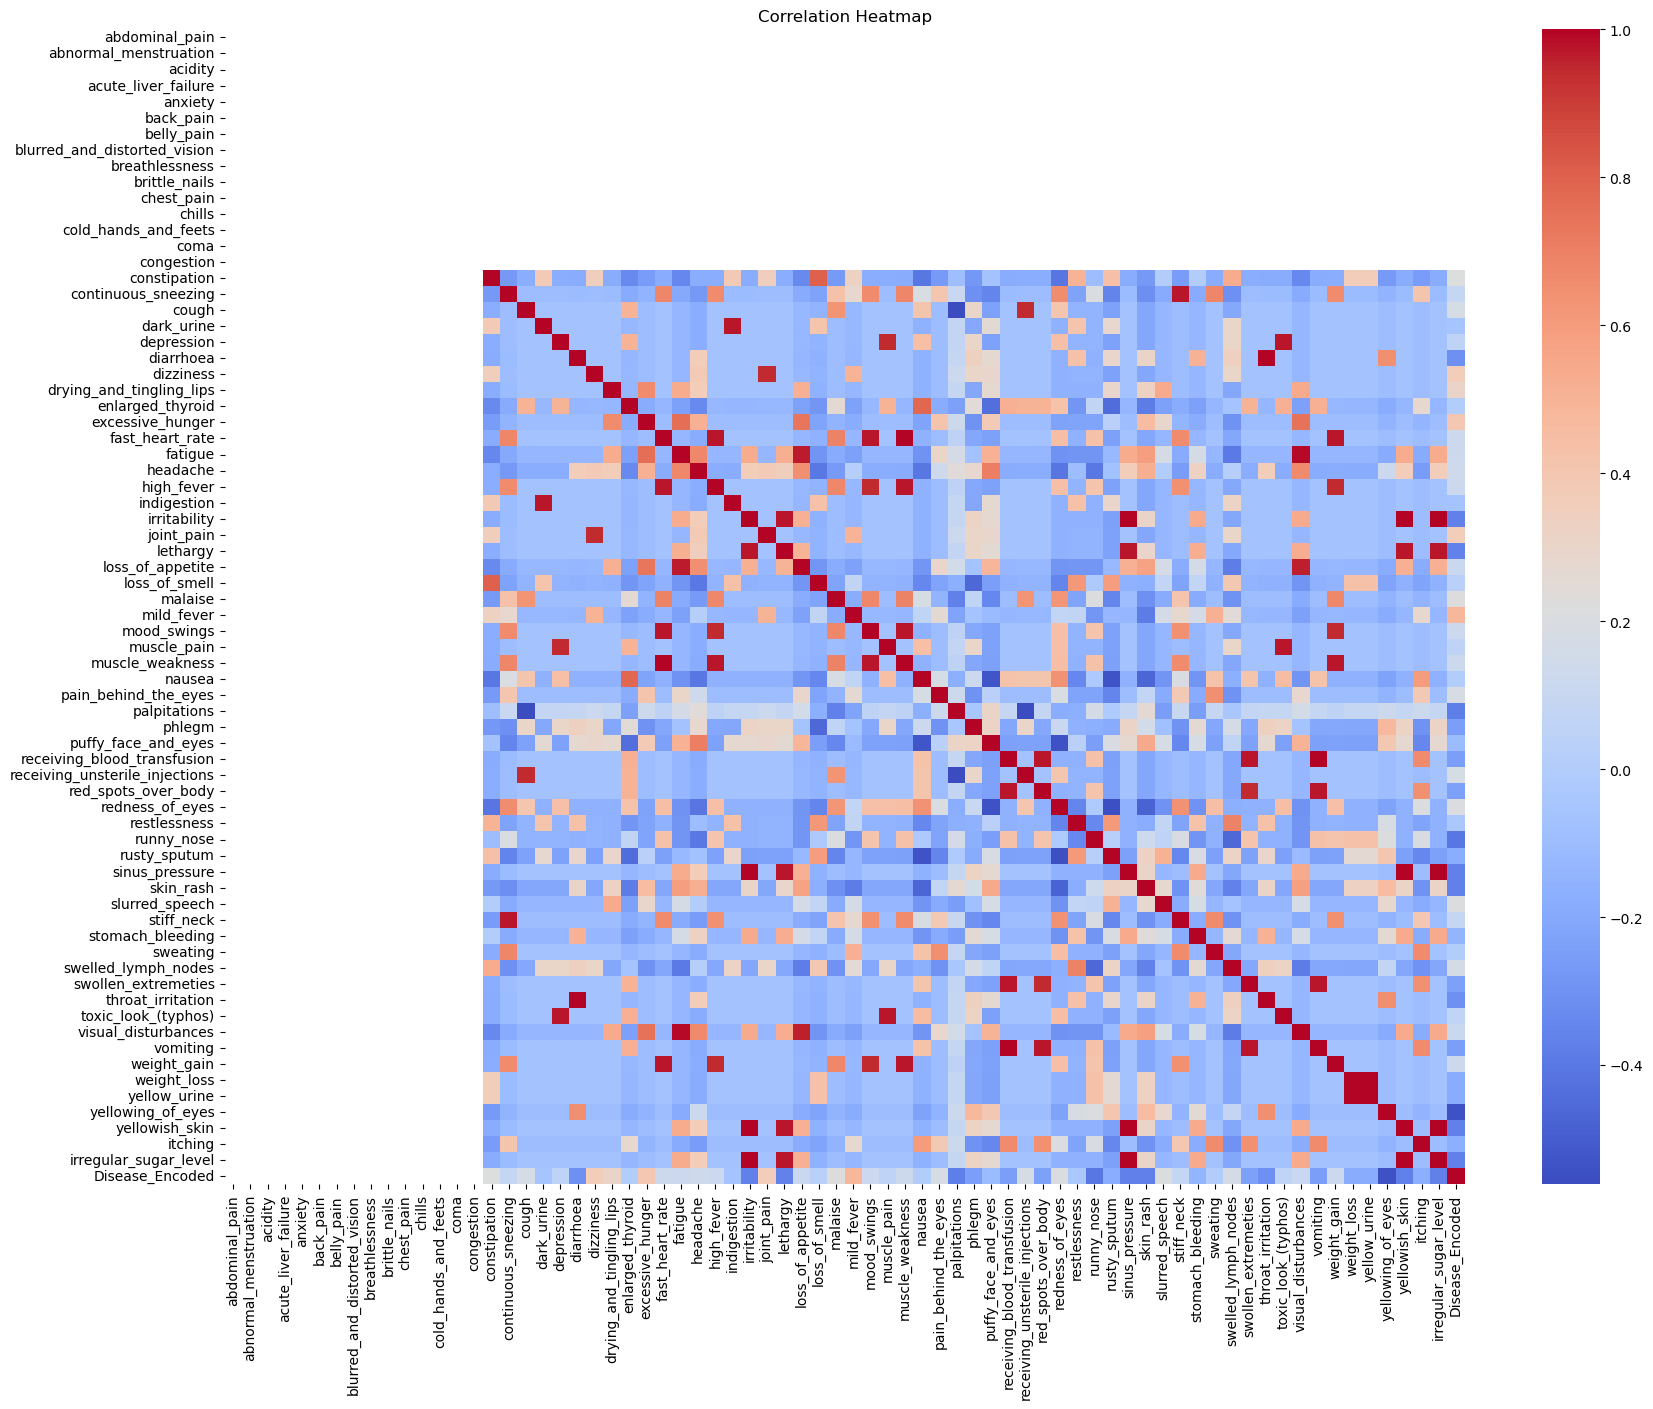

In [6]:
# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()